# A* algorithm for shortest path search

## 1 Extending the edges of map obstacles

The radius of human activity is 0.3 m, and the width represented by each pixel point in the map is 0.2 m, so we handle this by first increasing the width of the black obstacle edge part of the map by one black pixel point, and then the human performs the shortest path search on top of the newly generated map, which can greatly reduce the computational effort of the program.

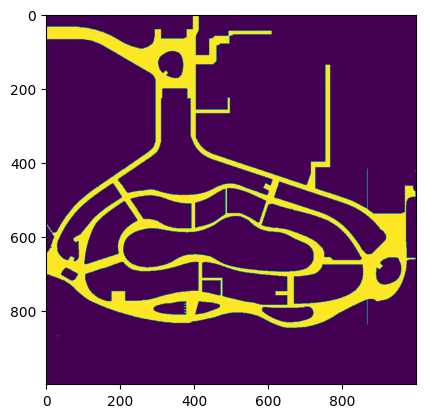

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read binary images
img = cv2.imread(r'E:\python_work\pythonProject\homework\homework3\map\vivoCityBin.png', cv2.IMREAD_GRAYSCALE)

# Create a blank image
result = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)

# Edge expansion algorithm
for i in range(1, img.shape[0]-1):
    for j in range(1, img.shape[1]-1):
        if (img[i-1, j] == 0 or img[i-1, j-1] == 0 or img[i-1, j+1] == 0 or img[i, j+1] == 0
        or img[i, j-1] == 0 or img[i+1, j-1] == 0 or img[i+1, j] == 0 or img[i+1, j+1] == 0):
            result[i, j] = 0
        else:
            result[i, j] = 255
plt.imshow(result)
plt.show()
# Save results
# cv2.imwrite(r"E:\python_work\pythonProject\homework\homework3\map\blackCircle.png", result)

## Shortest path algorithm

### Define a function to find the shortest path, so that it can be called later in a loop

The heuristic function used here is H = 1.5*(dx2 + dy2), which makes finding the shortest path more efficient than other functions and gives a relatively short result

In [14]:
import math
import time
import cv2
import numpy as np
from matplotlib import pyplot as plt


def calMinL(starLocation, endLocation):
    start_time = time.time()

    # Reads a grayscale image of the map, with a grayscale of 0 indicating an obstacle
    readMap = cv2.imread(r"E:\python_work\pythonProject\homework\homework3\map\blackCircle.png",
                         cv2.IMREAD_GRAYSCALE)
    # Images for drawing paths
    writeMap = cv2.imread(r"E:\python_work\pythonProject\homework\homework3\map\vivocity.png")
    mapSize = np.array(readMap)
    hight = mapSize.shape[0]
    width = mapSize.shape[1]

    # Representation of the start and end points of the map,
    # with the location of the point, the value of the cost function, and the parent node
    startX, startY = starLocation[0], starLocation[1]
    endX, endY = endLocation[0], endLocation[1]
    startPrice = max(abs(startX - endX), abs(startY - endY))
    endPrice = abs(startX - endX) + abs(startY - endY)
    start = {'pos': (startX, startY), 'price': startPrice, 'fNode': (startX, startY)}
    end = {'pos': (endX, endY), 'price': endPrice, 'fNode': (endX, endY)}

    openList = []  # Storage possibility path
    closeList = [start]  # Storage of travelled paths
    # Search for step lengths, to increase the efficiency of the program run,
    # use larger step lengths until you are close to the end
    step_size = 4

    while True:
        # Get the position of the last point in the closeList
        lastPoint = closeList[-1]['pos']
        # Eight adjacent pixel points of possible motion
        add = ([0, step_size], [0, -step_size], [step_size, 0], [-step_size, 0], [step_size, step_size],
               [step_size, -step_size], [-step_size, step_size], [-step_size, -step_size])
        for i in range(len(add)):
            x = lastPoint[0] + add[i][0]
            # Skip if the search is outside the image size range
            if x < 0 or x >= width:
                continue
            y = lastPoint[1] + add[i][1]
            if y < 0 or y >= hight:
                continue
            dx1 = abs(x - start['pos'][0])
            dy1 = abs(y - start['pos'][1])
            dx2 = abs(x - end['pos'][0])
            dy2 = abs(y - end['pos'][1])
            G = dx1 + dy1  # G-price
            # H = (dx2 + dy2) + 1.586 * min(dx2, dy2)  # H-price
            H = 1.5*(dx2 + dy2)
            F = G + H
            # As the end point is gradually approached, the search steps become smaller
            if H < 20:
                step_size = 1
            addpoint = {'pos': (x, y), 'price': F, 'fNode': lastPoint}  # New-position
            count = 0
            # If the point is in one of the two lists, mark it
            for j in openList:
                if j['pos'] == addpoint['pos']:
                    count = 1
            for k in closeList:
                if k['pos'] == addpoint['pos']:
                    count = 1
            if count == 0:
                if readMap[y, x] != 0:  # The point is a non-obstacle
                    openList.append(addpoint)

        tempPoint = {'pos': (startX, startY), 'price': 10000, 'fNode': (startX, startY)}
        # Finding the least costly point
        for j in range(len(openList)):
            if openList[j]['price'] < tempPoint['price']:
                tempPoint = openList[j]
        # Delete tempPoint in openList
        for j in range(len(openList)):
            if tempPoint == openList[j]:
                openList.pop(j)
                break
        # Add tempPoint to the closeList
        closeList.append(tempPoint)
        # Find the end point and exit
        if tempPoint['pos'] == end['pos']:
            break
    # print(closelist)

    # Reverse search to find the path
    road = []
    road.append(closeList[-1])
    point = road[-1]
    distance = 0

    while True:
        for i in closeList:
            # The parent node is the previous point of the current point
            if i['pos'] == point['fNode']:
                distance += math.sqrt((point['pos'][0] - i['pos'][0]) ** 2 + (point['pos'][1] - i['pos'][1]) ** 2)
                point = i  # point = road[-1]
                road.append(point)
        if point == start:
            print('The shortest distance between these two points is：' + str(0.2 * distance))
            break

    # Draw the planned path
    for i in road:
        cv2.circle(writeMap, i['pos'], 1, (255, 0, 0), -1)

    cv2.circle(writeMap, start['pos'], 5, (0, 255, 0), -1)
    cv2.circle(writeMap, end['pos'], 5, (0, 0, 255), -1)

    end_time = time.time()
    total_time = end_time - start_time
    print(f"The program execution time is：{total_time}s")

    plt.imshow(writeMap)
    plt.show()
    # cv2.imwrite(r"E:\python_work\pythonProject\homework\homework3\map\result.png", writeMap)

#### The shortest paths to other points starting at start

The shortest distance between these two points is：146.55088014401016
The program execution time is：0.949000358581543s


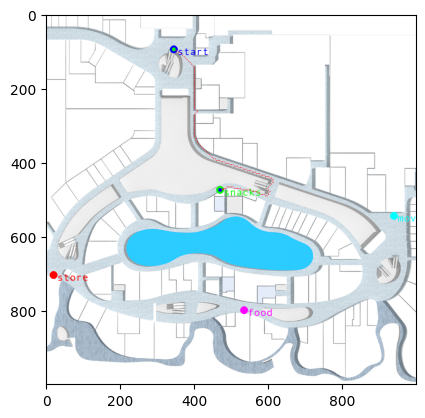

The image above is the shortest path from start to snacks

The shortest distance between these two points is：161.06113985445427
The program execution time is：0.10037374496459961s


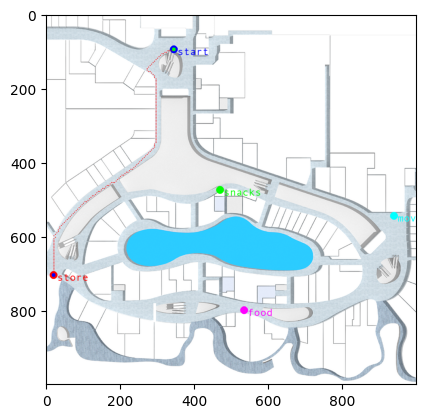

The image above is the shortest path from start to store

The shortest distance between these two points is：181.89301576774128
The program execution time is：0.25199079513549805s


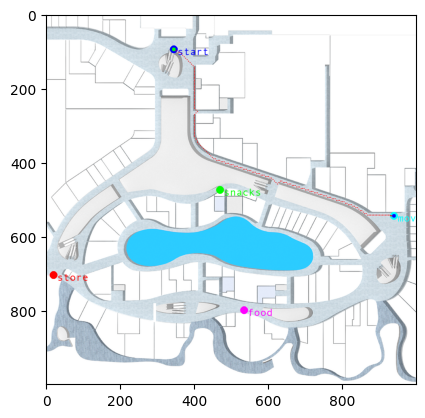

The image above is the shortest path from start to movie

The shortest distance between these two points is：322.6473447002925
The program execution time is：2.8393819332122803s


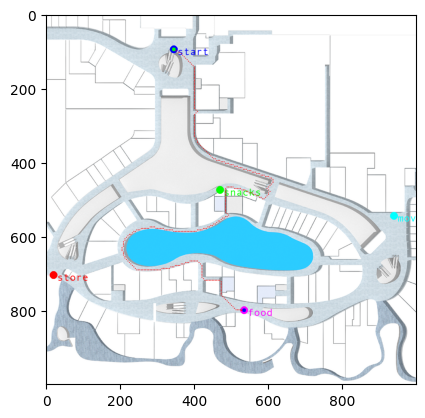

The image above is the shortest path from start to food



In [15]:
if __name__ == "__main__":
    locations = {'start': [345, 95],  # Start from the level 2 Escalator
                 'snacks': [470, 475],  # Garrett Popcorn
                 'store': [20, 705],  # DJI Store
                 'movie': [940, 545],  # Golden Village
                 'food': [535, 800],  # PUTIEN
                 }
    for key, value in locations.items():
        if key == 'start':
            continue
        else:
            calMinL(locations['start'], value)
            print('The image above is the shortest path from start to '+ key)
            print()

#### The shortest paths to other points starting at snacks

The shortest distance between these two points is：156.27636354360405
The program execution time is：0.2381908893585205s


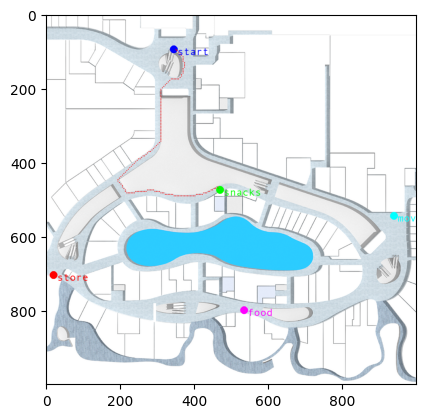

The image above is the shortest path from snacks to start

The shortest distance between these two points is：124.39108216936548
The program execution time is：0.04834127426147461s


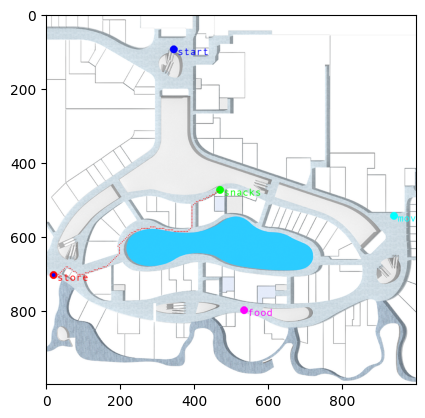

The image above is the shortest path from snacks to store

The shortest distance between these two points is：139.20285706997458
The program execution time is：0.1578516960144043s


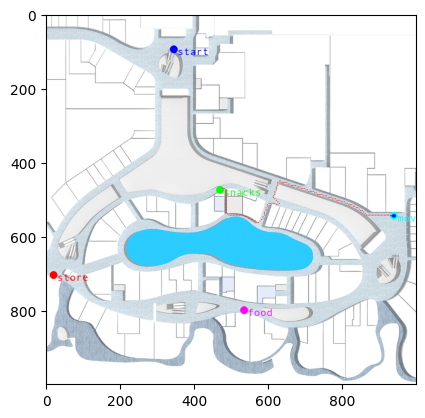

The image above is the shortest path from snacks to movie

The shortest distance between these two points is：136.3141269071954
The program execution time is：0.551433801651001s


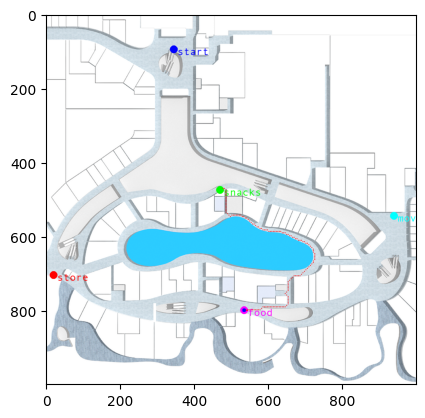

The image above is the shortest path from snacks to food



In [16]:
    for key, value in locations.items():
        if key == 'snacks':
            continue
        else:
            calMinL(locations['snacks'], value)
            print('The image above is the shortest path from snacks to '+ key)
            print()

#### The shortest paths to other points starting at store

The shortest distance between these two points is：171.90277041479723
The program execution time is：0.118560791015625s


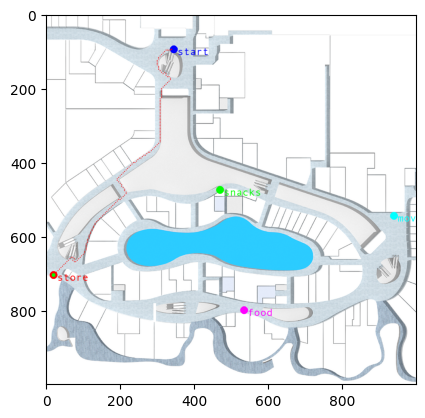

The image above is the shortest path from store to start

The shortest distance between these two points is：120.72245301926397
The program execution time is：0.04691004753112793s


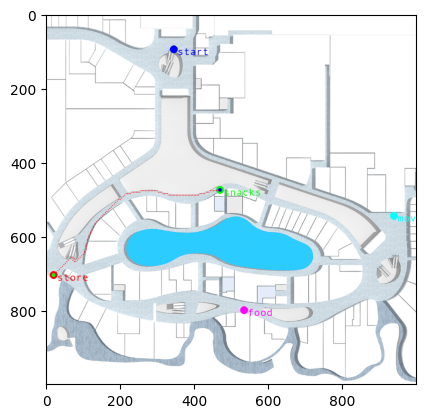

The image above is the shortest path from store to snacks

The shortest distance between these two points is：248.2331311379193
The program execution time is：0.17554020881652832s


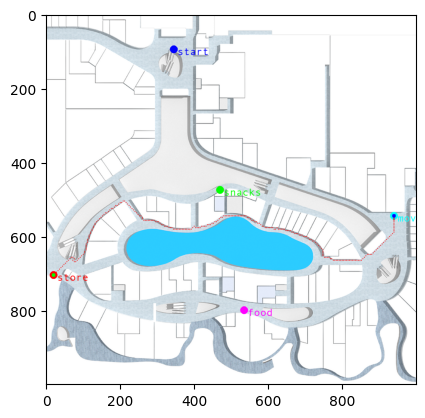

The image above is the shortest path from store to movie

The shortest distance between these two points is：120.22884553295685
The program execution time is：0.05663585662841797s


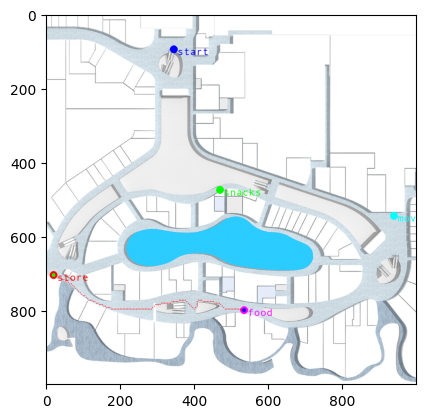

The image above is the shortest path from store to food



In [17]:
    for key, value in locations.items():
        if key == 'store':
            continue
        else:
            calMinL(locations['store'], value)
            print('The image above is the shortest path from store to '+ key)
            print()

#### The shortest paths to other points starting at movie

The shortest distance between these two points is：183.21849916733518
The program execution time is：0.16022658348083496s


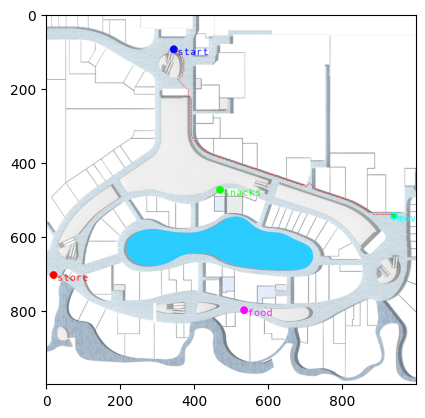

The image above is the shortest path from movie to start

The shortest distance between these two points is：108.55189027078671
The program execution time is：0.04817509651184082s


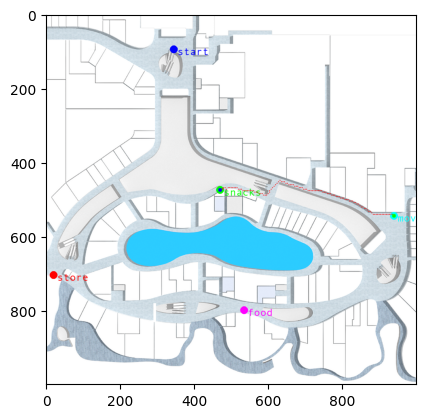

The image above is the shortest path from movie to snacks

The shortest distance between these two points is：218.97829714197997
The program execution time is：0.10665035247802734s


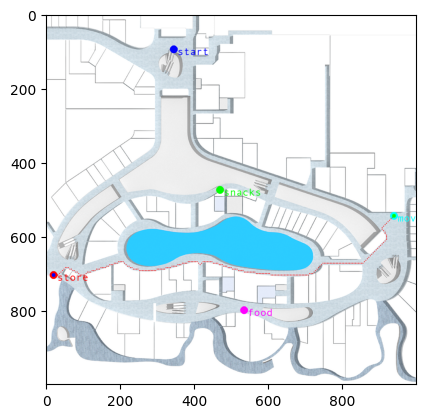

The image above is the shortest path from movie to store

The shortest distance between these two points is：118.47981233214465
The program execution time is：0.04798460006713867s


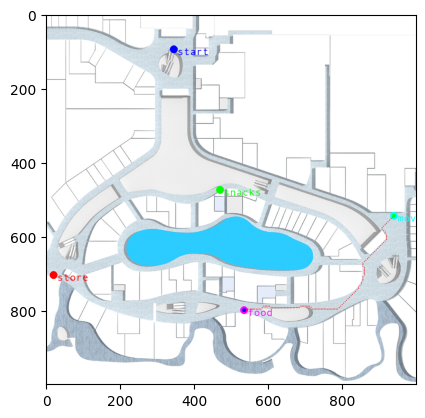

The image above is the shortest path from movie to food



In [18]:
    for key, value in locations.items():
        if key == 'movie':
            continue
        else:
            calMinL(locations['movie'], value)
            print('The image above is the shortest path from movie to '+ key)
            print()

#### The shortest paths to other points starting at food

The shortest distance between these two points is：335.2865365988712
The program execution time is：1.9879536628723145s


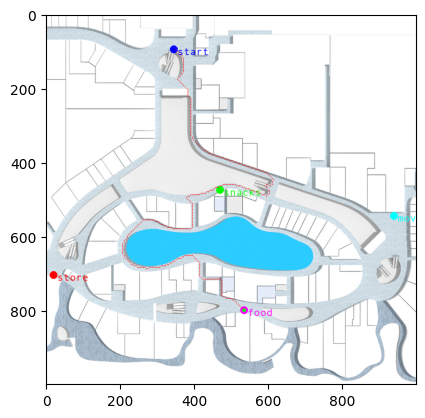

The image above is the shortest path from food to start

The shortest distance between these two points is：189.26803743153565
The program execution time is：0.9477348327636719s


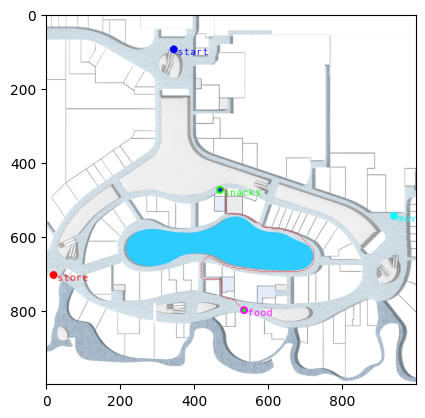

The image above is the shortest path from food to snacks

The shortest distance between these two points is：135.95432893255077
The program execution time is：0.06044125556945801s


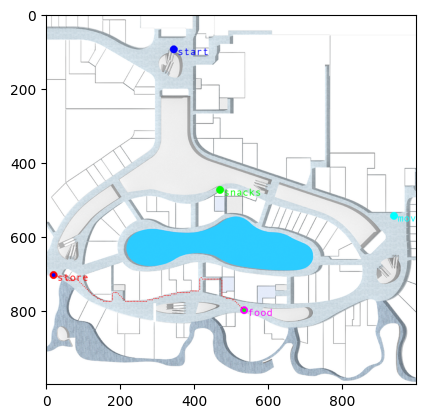

The image above is the shortest path from food to store

The shortest distance between these two points is：119.65138520739843
The program execution time is：0.05702400207519531s


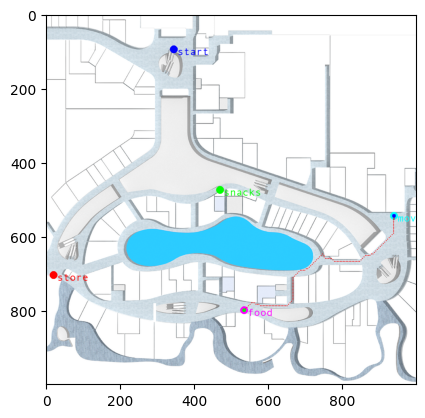

The image above is the shortest path from food to movie



In [19]:
    for key, value in locations.items():
        if key == 'food':
            continue
        else:
            calMinL(locations['food'], value)
            print('The image above is the shortest path from food to '+ key)
            print()

### Try different heuristic functions

#### H = max(dx2,dy2)

Other heuristic functions are less efficient to run, here the Chebyshev distance is used as the heuristic function, i.e. H = max(dx2,dy2)

In [20]:
import math
import time
import cv2
import numpy as np
from matplotlib import pyplot as plt


def Chebyshev(starLocation, endLocation):
    start_time = time.time()

    # Reads a grayscale image of the map, with a grayscale of 0 indicating an obstacle
    readMap = cv2.imread(r"E:\python_work\pythonProject\homework\homework3\map\blackCircle.png",
                         cv2.IMREAD_GRAYSCALE)
    # Images for drawing paths
    writeMap = cv2.imread(r"E:\python_work\pythonProject\homework\homework3\map\vivocity.png")
    mapSize = np.array(readMap)
    hight = mapSize.shape[0]
    width = mapSize.shape[1]

    # Representation of the start and end points of the map,
    # with the location of the point, the value of the cost function, and the parent node
    startX, startY = starLocation[0], starLocation[1]
    endX, endY = endLocation[0], endLocation[1]
    startPrice = max(abs(startX - endX), abs(startY - endY))
    endPrice = abs(startX - endX) + abs(startY - endY)
    start = {'pos': (startX, startY), 'price': startPrice, 'fNode': (startX, startY)}
    end = {'pos': (endX, endY), 'price': endPrice, 'fNode': (endX, endY)}

    openList = []  # Storage possibility path
    closeList = [start]  # Storage of travelled paths
    # Search for step lengths, to increase the efficiency of the program run,
    # use larger step lengths until you are close to the end
    step_size = 4

    while True:
        # Get the position of the last point in the closeList
        lastPoint = closeList[-1]['pos']
        # Eight adjacent pixel points of possible motion
        add = ([0, step_size], [0, -step_size], [step_size, 0], [-step_size, 0], [step_size, step_size],
               [step_size, -step_size], [-step_size, step_size], [-step_size, -step_size])
        for i in range(len(add)):
            x = lastPoint[0] + add[i][0]
            # Skip if the search is outside the image size range
            if x < 0 or x >= width:
                continue
            y = lastPoint[1] + add[i][1]
            if y < 0 or y >= hight:
                continue
            dx1 = abs(x - start['pos'][0])
            dy1 = abs(y - start['pos'][1])
            dx2 = abs(x - end['pos'][0])
            dy2 = abs(y - end['pos'][1])
            G = dx1 + dy1  # G-price
            # H = (dx2 + dy2) + 1.586 * min(dx2, dy2)  # H-price
            H = max(dx2 , dy2)
            F = G + H
            # As the end point is gradually approached, the search steps become smaller
            if H < 20:
                step_size = 1
            addpoint = {'pos': (x, y), 'price': F, 'fNode': lastPoint}  # New-position
            count = 0
            # If the point is in one of the two lists, mark it
            for j in openList:
                if j['pos'] == addpoint['pos']:
                    count = 1
            for k in closeList:
                if k['pos'] == addpoint['pos']:
                    count = 1
            if count == 0:
                if readMap[y, x] != 0:  # The point is a non-obstacle
                    openList.append(addpoint)

        tempPoint = {'pos': (startX, startY), 'price': 10000, 'fNode': (startX, startY)}
        # Finding the least costly point
        for j in range(len(openList)):
            if openList[j]['price'] < tempPoint['price']:
                tempPoint = openList[j]
        # Delete tempPoint in openList
        for j in range(len(openList)):
            if tempPoint == openList[j]:
                openList.pop(j)
                break
        # Add tempPoint to the closeList
        closeList.append(tempPoint)
        # Find the end point and exit
        if tempPoint['pos'] == end['pos']:
            break
    # print(closelist)

    # Reverse search to find the path
    road = []
    road.append(closeList[-1])
    point = road[-1]
    distance = 0

    while True:
        for i in closeList:
            # The parent node is the previous point of the current point
            if i['pos'] == point['fNode']:
                distance += math.sqrt((point['pos'][0] - i['pos'][0]) ** 2 + (point['pos'][1] - i['pos'][1]) ** 2)
                point = i  # point = road[-1]
                road.append(point)
        if point == start:
            print('The shortest distance between these two points is：' + str(0.2 * distance))
            break

    # Draw the planned path
    for i in road:
        cv2.circle(writeMap, i['pos'], 1, (255, 0, 0), -1)

    cv2.circle(writeMap, start['pos'], 5, (0, 255, 0), -1)
    cv2.circle(writeMap, end['pos'], 5, (0, 0, 255), -1)

    end_time = time.time()
    total_time = end_time - start_time
    print(f"The program execution time is：{total_time}s")

    plt.imshow(writeMap)
    plt.show()
    # cv2.imwrite(r"E:\python_work\pythonProject\homework\homework3\map\result.png", writeMap)

Minimum distance from start to snacks and running time

The shortest distance between these two points is：155.13321779309646
The program execution time is：2.4415671825408936s


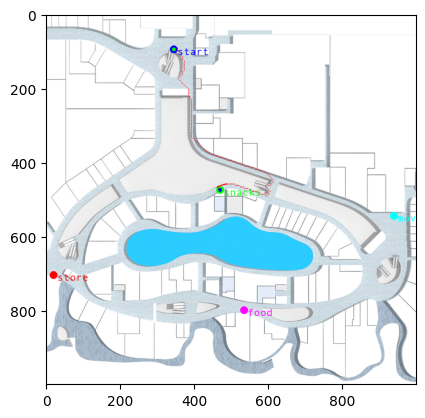

In [21]:
if __name__ == "__main__":
    locations = {'start': [345, 95],  # Start from the level 2 Escalator
                 'snacks': [470, 475],  # Garrett Popcorn
                 'store': [20, 705],  # DJI Store
                 'movie': [940, 545],  # Golden Village
                 'food': [535, 800],  # PUTIEN
                 }
    Chebyshev(locations['start'], locations['snacks'])

It can be seen that using the Chebyshev distance as a heuristic function is less efficient than the initial heuristic function, both in terms of execution and in terms of shortest distance calculation

    For  H = 1.5*(dx2 + dy2):
    The shortest distance between these two points is：146.55088014401016
    The program execution time is：1.0042376518249512s

    For H = max(dx2, dy2)
    The shortest distance between these two points is：155.13321779309646
    The program execution time is：2.363556146621704s

#### H = (dx2 + dy2) + 1.586 * min(dx2, dy2)

The shortest distance between these two points is：157.55676759431472
The program execution time is：0.875617504119873s


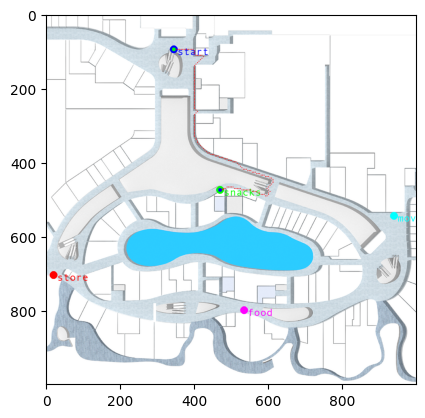

In [22]:
import math
import time
import cv2
import numpy as np
from matplotlib import pyplot as plt


def selfDef(starLocation, endLocation):
    start_time = time.time()

    # Reads a grayscale image of the map, with a grayscale of 0 indicating an obstacle
    readMap = cv2.imread(r"E:\python_work\pythonProject\homework\homework3\map\blackCircle.png",
                         cv2.IMREAD_GRAYSCALE)
    # Images for drawing paths
    writeMap = cv2.imread(r"E:\python_work\pythonProject\homework\homework3\map\vivocity.png")
    mapSize = np.array(readMap)
    hight = mapSize.shape[0]
    width = mapSize.shape[1]

    # Representation of the start and end points of the map,
    # with the location of the point, the value of the cost function, and the parent node
    startX, startY = starLocation[0], starLocation[1]
    endX, endY = endLocation[0], endLocation[1]
    startPrice = max(abs(startX - endX), abs(startY - endY))
    endPrice = abs(startX - endX) + abs(startY - endY)
    start = {'pos': (startX, startY), 'price': startPrice, 'fNode': (startX, startY)}
    end = {'pos': (endX, endY), 'price': endPrice, 'fNode': (endX, endY)}

    openList = []  # Storage possibility path
    closeList = [start]  # Storage of travelled paths
    # Search for step lengths, to increase the efficiency of the program run,
    # use larger step lengths until you are close to the end
    step_size = 4

    while True:
        # Get the position of the last point in the closeList
        lastPoint = closeList[-1]['pos']
        # Eight adjacent pixel points of possible motion
        add = ([0, step_size], [0, -step_size], [step_size, 0], [-step_size, 0], [step_size, step_size],
               [step_size, -step_size], [-step_size, step_size], [-step_size, -step_size])
        for i in range(len(add)):
            x = lastPoint[0] + add[i][0]
            # Skip if the search is outside the image size range
            if x < 0 or x >= width:
                continue
            y = lastPoint[1] + add[i][1]
            if y < 0 or y >= hight:
                continue
            dx1 = abs(x - start['pos'][0])
            dy1 = abs(y - start['pos'][1])
            dx2 = abs(x - end['pos'][0])
            dy2 = abs(y - end['pos'][1])
            G = dx1 + dy1  # G-price
            # H = (dx2 + dy2) + 1.586 * min(dx2, dy2)  # H-price
            H = (dx2 + dy2) + 1.586 * min(dx2, dy2)
            F = G + H
            # As the end point is gradually approached, the search steps become smaller
            if H < 20:
                step_size = 1
            addpoint = {'pos': (x, y), 'price': F, 'fNode': lastPoint}  # New-position
            count = 0
            # If the point is in one of the two lists, mark it
            for j in openList:
                if j['pos'] == addpoint['pos']:
                    count = 1
            for k in closeList:
                if k['pos'] == addpoint['pos']:
                    count = 1
            if count == 0:
                if readMap[y, x] != 0:  # The point is a non-obstacle
                    openList.append(addpoint)

        tempPoint = {'pos': (startX, startY), 'price': 10000, 'fNode': (startX, startY)}
        # Finding the least costly point
        for j in range(len(openList)):
            if openList[j]['price'] < tempPoint['price']:
                tempPoint = openList[j]
        # Delete tempPoint in openList
        for j in range(len(openList)):
            if tempPoint == openList[j]:
                openList.pop(j)
                break
        # Add tempPoint to the closeList
        closeList.append(tempPoint)
        # Find the end point and exit
        if tempPoint['pos'] == end['pos']:
            break
    # print(closelist)

    # Reverse search to find the path
    road = []
    road.append(closeList[-1])
    point = road[-1]
    distance = 0

    while True:
        for i in closeList:
            # The parent node is the previous point of the current point
            if i['pos'] == point['fNode']:
                distance += math.sqrt((point['pos'][0] - i['pos'][0]) ** 2 + (point['pos'][1] - i['pos'][1]) ** 2)
                point = i  # point = road[-1]
                road.append(point)
        if point == start:
            print('The shortest distance between these two points is：' + str(0.2 * distance))
            break

    # Draw the planned path
    for i in road:
        cv2.circle(writeMap, i['pos'], 1, (255, 0, 0), -1)

    cv2.circle(writeMap, start['pos'], 5, (0, 255, 0), -1)
    cv2.circle(writeMap, end['pos'], 5, (0, 0, 255), -1)

    end_time = time.time()
    total_time = end_time - start_time
    print(f"The program execution time is：{total_time}s")

    plt.imshow(writeMap)
    plt.show()
    # cv2.imwrite(r"E:\python_work\pythonProject\homework\homework3\map\result.png", writeMap)


if __name__ == "__main__":
    locations = {'start': [345, 95],  # Start from the level 2 Escalator
                 'snacks': [470, 475],  # Garrett Popcorn
                 'store': [20, 705],  # DJI Store
                 'movie': [940, 545],  # Golden Village
                 'food': [535, 800],  # PUTIEN
                 }
    selfDef(locations['start'], locations['snacks'])

This custom heuristic is more efficient in operation, but performs more poorly for shortest distances than Chebyshev distances, so this heuristic is not used.

    For  H = 1.5*(dx2+dy2):
    The shortest distance between these two points is：146.55088014401016
    The program execution time is：1.0042376518249512s

    For H = (dx2 + dy2) + 1.586 * min(dx2, dy2):
    The shortest distance between these two points is：157.55676759431472
    The program execution time is：0.8513076305389404s

### Degenerate the A* algorithm to Dijkstra’s Algorithm

Degenerate the A* algorithm to Dijkstra's Algorithm is to change the heuristic function to 0, considering only the role of G. The result obtained is the result of running Dijkstra's Algorithm

The shortest distance between these two points is：154.5592062560791
The program execution time is：686.6195297241211s


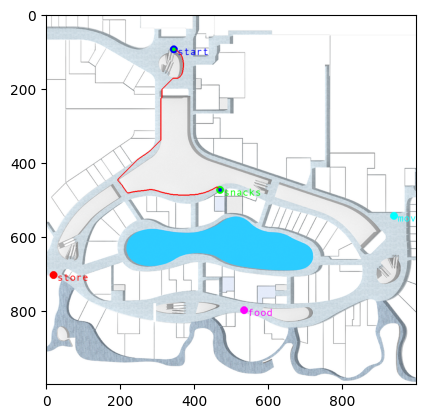

In [24]:
import math
import time
import cv2
import numpy as np
from matplotlib import pyplot as plt


def Dijkstra(starLocation, endLocation):
    start_time = time.time()

    # Reads a grayscale image of the map, with a grayscale of 0 indicating an obstacle
    readMap = cv2.imread(r"E:\python_work\pythonProject\homework\homework3\map\blackCircle.png",
                         cv2.IMREAD_GRAYSCALE)
    # Images for drawing paths
    writeMap = cv2.imread(r"E:\python_work\pythonProject\homework\homework3\map\vivocity.png")
    mapSize = np.array(readMap)
    hight = mapSize.shape[0]
    width = mapSize.shape[1]

    # Representation of the start and end points of the map,
    # with the location of the point, the value of the cost function, and the parent node
    startX, startY = starLocation[0], starLocation[1]
    endX, endY = endLocation[0], endLocation[1]
    startPrice = max(abs(startX - endX), abs(startY - endY))
    endPrice = abs(startX - endX) + abs(startY - endY)
    start = {'pos': (startX, startY), 'price': startPrice, 'fNode': (startX, startY)}
    end = {'pos': (endX, endY), 'price': endPrice, 'fNode': (endX, endY)}

    openList = []  # Storage possibility path
    closeList = [start]  # Storage of travelled paths
    # Search for step lengths, to increase the efficiency of the program run,
    # use larger step lengths until you are close to the end
    step_size = 4

    while True:
        # Get the position of the last point in the closeList
        lastPoint = closeList[-1]['pos']
        # Eight adjacent pixel points of possible motion
        add = ([0, step_size], [0, -step_size], [step_size, 0], [-step_size, 0], [step_size, step_size],
               [step_size, -step_size], [-step_size, step_size], [-step_size, -step_size])
        for i in range(len(add)):
            x = lastPoint[0] + add[i][0]
            # Skip if the search is outside the image size range
            if x < 0 or x >= width:
                continue
            y = lastPoint[1] + add[i][1]
            if y < 0 or y >= hight:
                continue
            dx1 = abs(x - start['pos'][0])
            dy1 = abs(y - start['pos'][1])
            dx2 = abs(x - end['pos'][0])
            dy2 = abs(y - end['pos'][1])
            G = dx1 + dy1  # G-price
            H = 0
            F = G + H
            # As the end point is gradually approached, the search steps become smaller
            if H < 20:
                step_size = 1
            addpoint = {'pos': (x, y), 'price': F, 'fNode': lastPoint}  # New-position
            count = 0
            # If the point is in one of the two lists, mark it
            for j in openList:
                if j['pos'] == addpoint['pos']:
                    count = 1
            for k in closeList:
                if k['pos'] == addpoint['pos']:
                    count = 1
            if count == 0:
                if readMap[y, x] != 0:  # The point is a non-obstacle
                    openList.append(addpoint)

        tempPoint = {'pos': (startX, startY), 'price': 10000, 'fNode': (startX, startY)}
        # Finding the least costly point
        for j in range(len(openList)):
            if openList[j]['price'] < tempPoint['price']:
                tempPoint = openList[j]
        # Delete tempPoint in openList
        for j in range(len(openList)):
            if tempPoint == openList[j]:
                openList.pop(j)
                break
        # Add tempPoint to the closeList
        closeList.append(tempPoint)
        # Find the end point and exit
        if tempPoint['pos'] == end['pos']:
            break
    # print(closelist)

    # Reverse search to find the path
    road = []
    road.append(closeList[-1])
    point = road[-1]
    distance = 0

    while True:
        for i in closeList:
            # The parent node is the previous point of the current point
            if i['pos'] == point['fNode']:
                distance += math.sqrt((point['pos'][0] - i['pos'][0]) ** 2 + (point['pos'][1] - i['pos'][1]) ** 2)
                point = i  # point = road[-1]
                road.append(point)
        if point == start:
            print('The shortest distance between these two points is：' + str(0.2 * distance))
            break

    # Draw the planned path
    for i in road:
        cv2.circle(writeMap, i['pos'], 1, (255, 0, 0), -1)

    cv2.circle(writeMap, start['pos'], 5, (0, 255, 0), -1)
    cv2.circle(writeMap, end['pos'], 5, (0, 0, 255), -1)

    end_time = time.time()
    total_time = end_time - start_time
    print(f"The program execution time is：{total_time}s")

    plt.imshow(writeMap)
    plt.show()
    # cv2.imwrite(r"E:\python_work\pythonProject\homework\homework3\map\result.png", writeMap)


if __name__ == "__main__":
    locations = {'start': [345, 95],  # Start from the level 2 Escalator
                 'snacks': [470, 475],  # Garrett Popcorn
                 'store': [20, 705],  # DJI Store
                 'movie': [940, 545],  # Golden Village
                 'food': [535, 800],  # PUTIEN
                 }
    Dijkstra(locations['start'], locations['snacks'])

It can be seen that Dijkstra's Algorithm is much slower than the A* algorithm in terms of execution efficiency, resulting in a lot of wasted runtime.